# Notebook for testing the algorithms under Google colab

## 1. Introduction
The algorithms are defined in the publication:
    Javier Sánchez, The Inverse Compositional Algorithm for Parametric Registration, Image Processing On Line, 6 (2016), pp. 212–232. https://doi.org/10.5201/ipol.2016.153

The algorithms are implemented in Python as a result of a translation from the original C++ code released by the author.
The repository used here contains a dataset with images and the ground truth transformations to test the algorithms, as the ones available in the online demo on IPOL: https://ipolcore.ipol.im/demo/clientApp/demo.html?id=153
This enable users of this notebook to check easily the validity of the python implementation.

## 2.Test of algorithms

In [1]:
import matplotlib.pyplot as plt
import imageio
import os
import sys
import skimage as ski

print(os.getcwd())
sys.path.append(os.path.abspath("../src/"))
from inverse_compositional_algorithm import inverse_compositional_algorithm, robust_inverse_compositional_algorithm, pyramidal_inverse_compositional_algorithm
import configuration_handler as cfh
import image_optimisation as io

/mnt/git/computational_astro/inverse_compositional_algorithm/test


### Preparation of the configuration file

We create a configuration file with the meta parameters for the algorithm. 

In [2]:
cfh.create_config_file("config.ini")
# reading the parameters from the configuration file
params = cfh.read_config_file("config.ini")
params_ica = params["inverse_compositional_algorithm"]
params_rica = params["robust_inverse_compositional_algorithm"]
params_pica = params["pyramidal_inverse_compositional_algorithm"]

# define a dict with image filename and transformation ground truth

# calling the pipeline
# output_img, debug_dict = process(pic_root, options, params)


### Preparation of the dataset

In [3]:
import transformation as tf
import numpy as np
import os.path as path

In [4]:
# A dataset with simple transformations for unit testing
dataset_tu = {
    "rubber_whale_tr": {
        "filename": "rubber_whale.png",
        "transformation_type": tf.TransformType.TRANSLATION,
        "gt": [10, 5] # [tx,ty]
    },
    "rubber_whale_rt": {
        "filename": "rubber_whale.png",
        "transformation_type": tf.TransformType.EUCLIDEAN,
        "gt": [0., 0., -np.pi/4.] # [tx,ty,theta] -> ROTATION, theta in radians and counterclockwise
    },
    "rubber_whale_eu": {
        "filename": "rubber_whale.png",
        "transformation_type": tf.TransformType.EUCLIDEAN,
        "gt": [10., 5., -np.pi/4.] # [tx,ty,theta] -> ROTATION, theta in radians and counterclockwise
    },
    "rubber_whale_zo": {
        "filename": "rubber_whale.png",
        "transformation_type": tf.TransformType.SIMILARITY,
        "gt": [0., 0., -0.1, 0.] # [tx,ty,a,b] -> ZOOM
    }
}

In [5]:
print("The current directory is: ", os.getcwd())
image_path = os.path.join(os.getcwd(), "data")

The current directory is:  /mnt/git/computational_astro/inverse_compositional_algorithm/test


/tmp/ipykernel_94488/1538682540.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  original_image = imageio.imread(path.join(image_path, sample["filename"]))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dataset image:  rubber_whale_tr
	Filename:  rubber_whale.png
	Image shape:  (388, 584, 3)
	Type of data format:  uint8
Dataset image:  rubber_whale_rt
	Filename:  rubber_whale.png
	Image shape:  (388, 584, 3)
	Type of data format:  uint8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dataset image:  rubber_whale_eu
	Filename:  rubber_whale.png
	Image shape:  (388, 584, 3)
	Type of data format:  uint8
Dataset image:  rubber_whale_zo
	Filename:  rubber_whale.png
	Image shape:  (388, 584, 3)
	Type of data format:  uint8


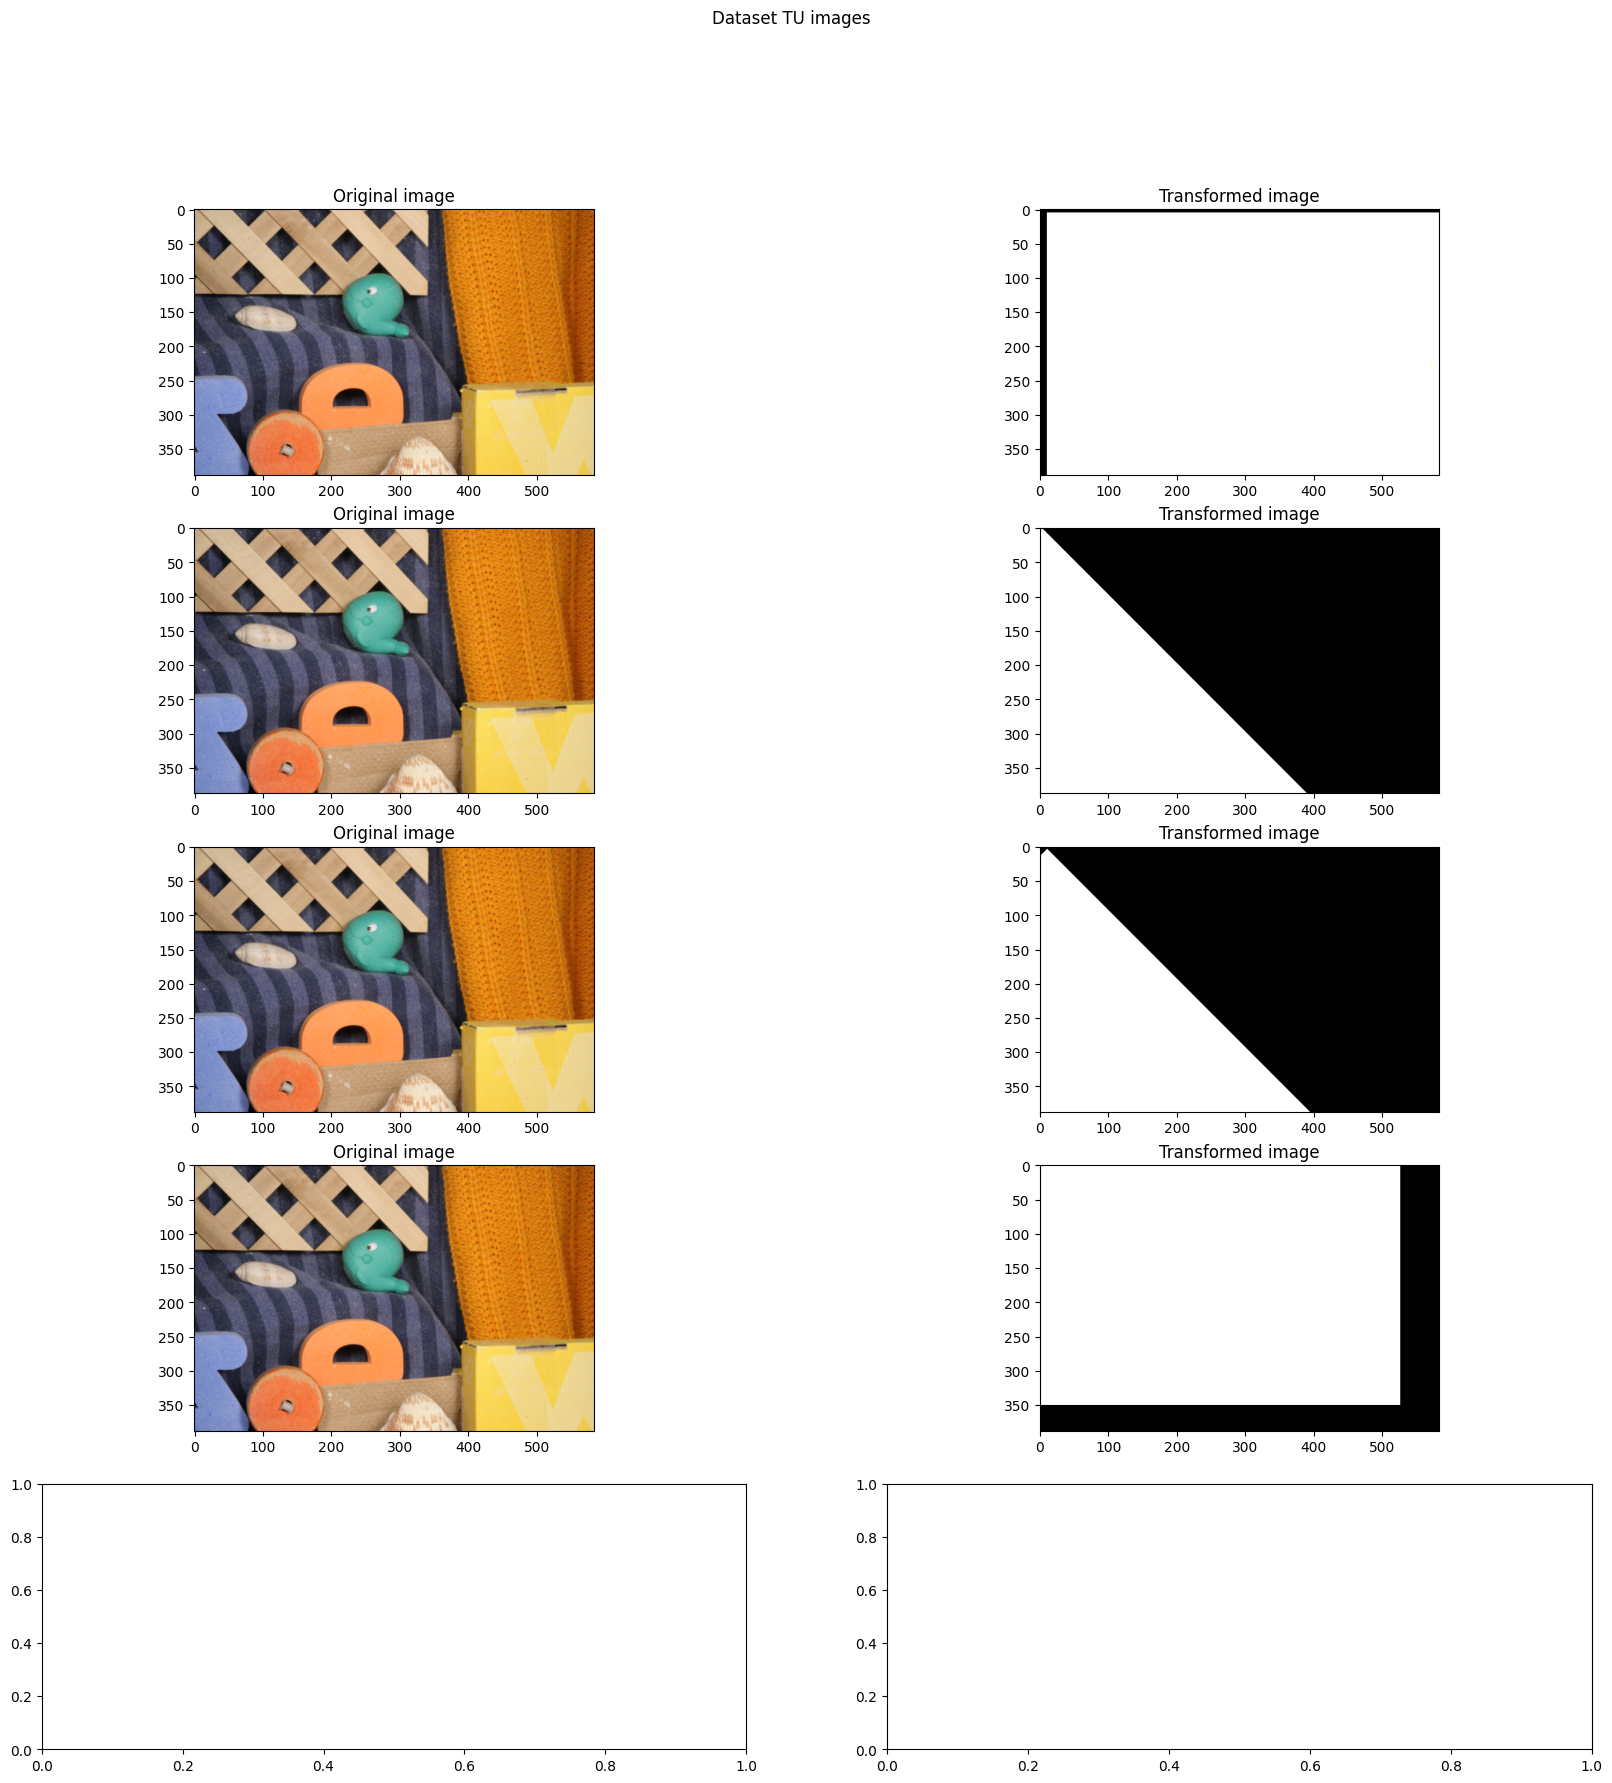

In [6]:
# transform the images and show them
fig, axs = plt.subplots(5, 2, figsize=(20,20))
fig.suptitle("Dataset TU images")
i = 0
for sample_key, sample in dataset_tu.items():
    print("Dataset image: ", sample_key)
    print("\tFilename: ", sample["filename"])
    original_image = imageio.imread(path.join(image_path, sample["filename"]))
    print("\tImage shape: ", original_image.shape)
    print("\tType of data format: ", original_image.dtype)
    # print("\tChanging data format to double ...")
    # original_image = original_image.astype(np.double)
    # print("\tType of data format: ", original_image.dtype)
    sample["original_image"] = original_image
    transformation_type = sample["transformation_type"]
    gt = sample["gt"]
    # we transform the source image to the target image according to the ground truth
    transformed_image = tf.transform_image(original_image, transformation_type, gt, preserve_range=True)
    # print("\tType of transformed image: ", transformed_image.dtype)
    sample["transformed_image"] = transformed_image

    # display the image
    axs[i][0].imshow(original_image)
    axs[i][0].set_title("Original image")
    # axs[i][1].imshow(source_image)
    # axs[i][1].set_title("Source image")
    axs[i][1].imshow(transformed_image)
    axs[i][1].set_title("Transformed image")
    i += 1

plt.show()

In [7]:
# We try to define a similar dataset as the one used in the online demo
dataset = {
    "rubber_whale": {
        "filename": "rubber_whale.png",
        "transformation_type": tf.TransformType.AFFINITY,
        "gt": [0.5, -0.5, -0.09, -0.1, -0.1, 0.05] # [tx,ty,a00,a01,a10,a11]
    },
    "mandrill": {
        "filename": "mandrill.tiff",
        "transformation_type": tf.TransformType.SIMILARITY,
        "gt": [0., 0., 0., 0.] # [tx, ty, a, b] -> IDENTITY
    },
    "lena": {
        "filename": "lena_color.tiff",
        "transformation_type": tf.TransformType.EUCLIDEAN,
        "gt": [0., 0., -0.1] # [tx, ty, theta] -> ROTATION, theta in radians and counterclockwise
    },
    "hydrangea": {
        "filename": "hydrangea.png",   
        "transformation_type": tf.TransformType.SIMILARITY,
        "gt": [38.798, 14.102, -0.10112, -0.044981] # [tx, ty, a, b] -> ZOOM+ROTATION+TRANSLATION
    },
    "dimetrodon": {
        "filename": "dimetrodon.png",
        "transformation_type": tf.TransformType.SIMILARITY,
        "gt": [47.944, -5.9639, -0.1045, 0.08985] # [tx, ty, a, b] -> ZOOM+ROTATION
    },
}

**Important note:**
The gt parameters are taken from the online demo of the original software. Please note that in the online demo, the source image is the one that is transformed.
So, I_transformed = params2matrix(gt) * I_source 
We need to invert the transformation to get the correct transformation for the python implementation.

/tmp/ipykernel_94488/2206014143.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  original_image = imageio.imread(path.join(image_path, dataset[sample]["filename"]))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dataset image:  rubber_whale
	Filename:  rubber_whale.png
	Image shape:  (388, 584, 3)
i:  0
Dataset image:  mandrill
	Filename:  mandrill.tiff
	Image shape:  (512, 512, 3)
i:  1
Dataset image:  lena
	Filename:  lena_color.tiff


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	Image shape:  (512, 512, 3)
i:  2
Dataset image:  hydrangea
	Filename:  hydrangea.png
	Image shape:  (388, 584, 3)
i:  3
Dataset image:  dimetrodon
	Filename:  dimetrodon.png
	Image shape:  (388, 584, 3)
i:  4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


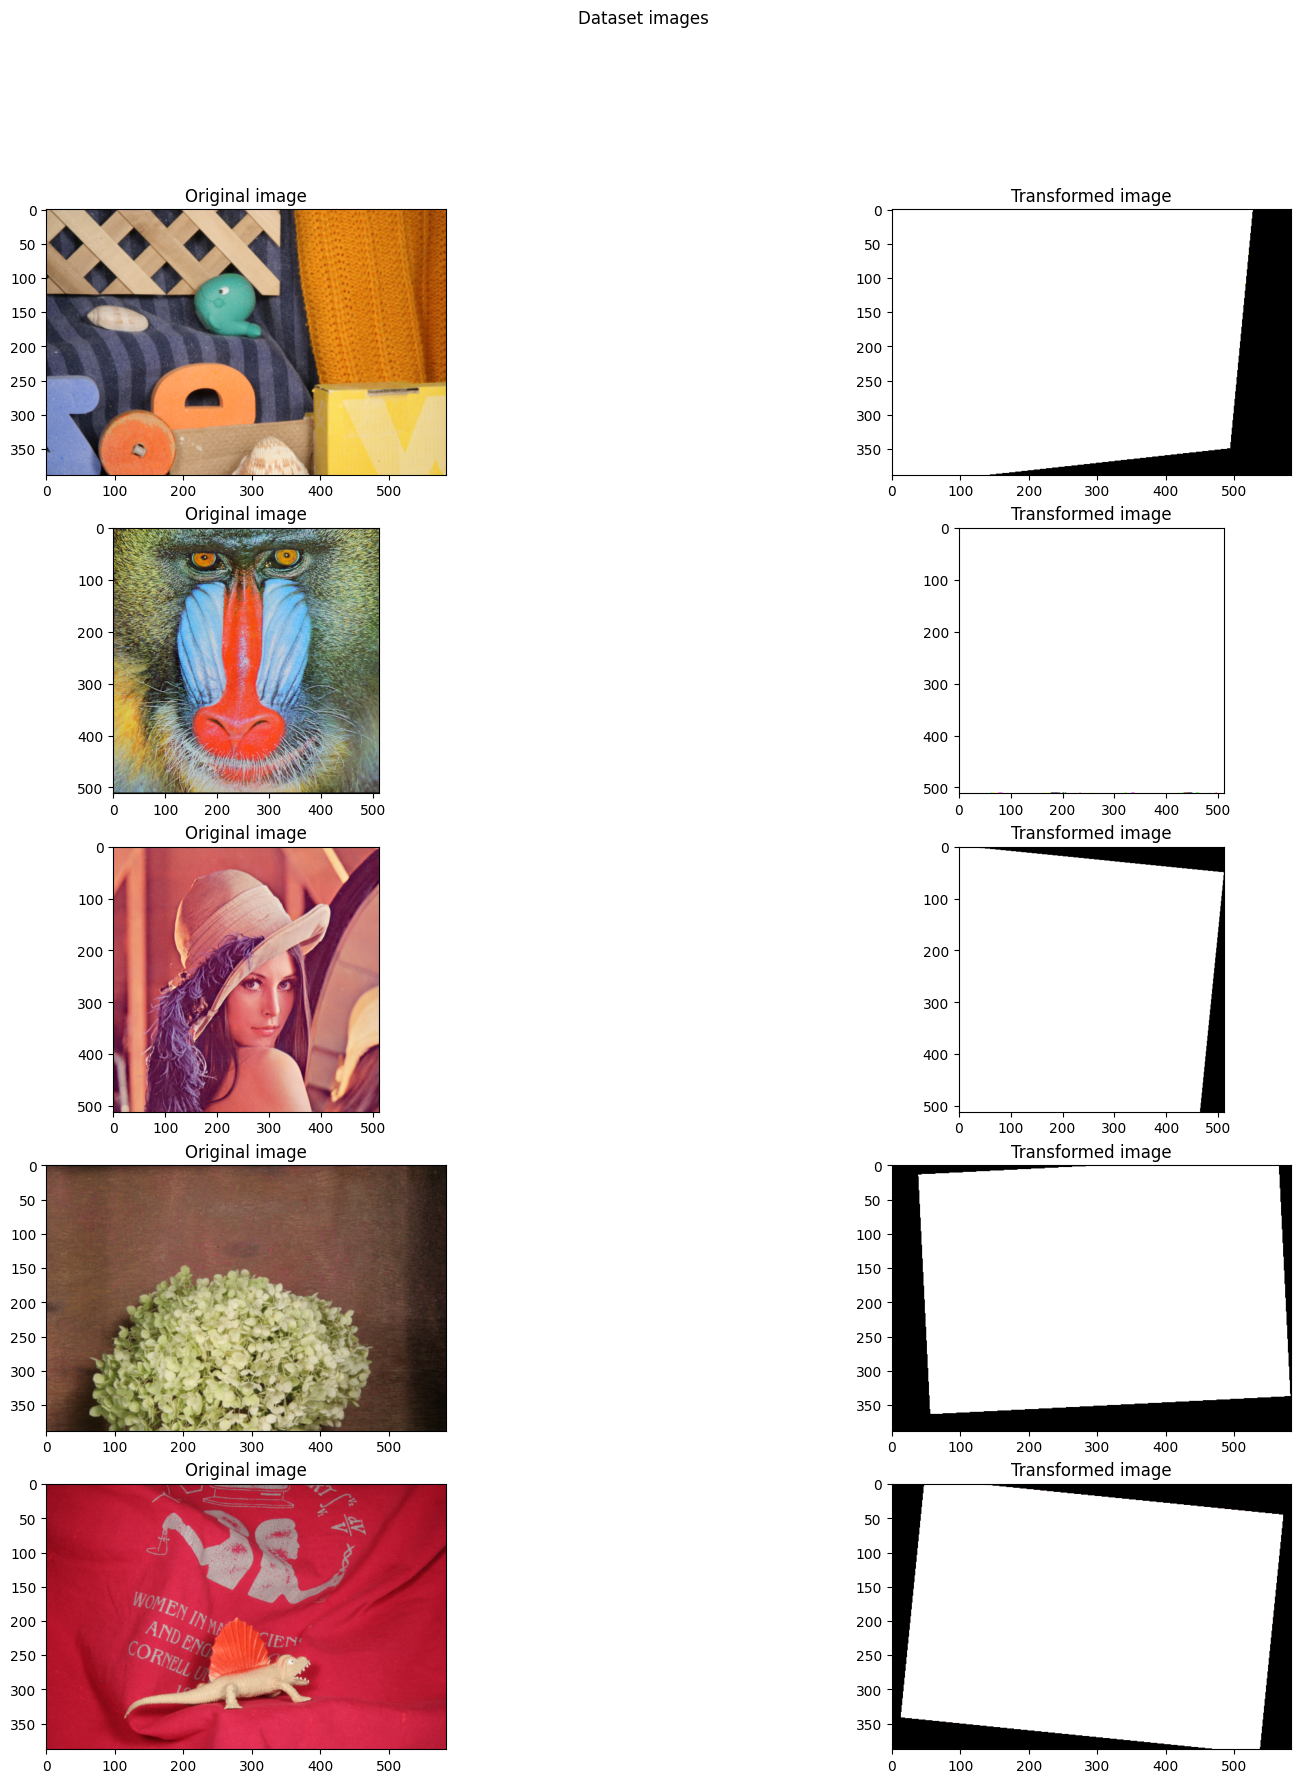

In [8]:
fig, axs = plt.subplots(5, 2, figsize=(20,20))
fig.suptitle("Dataset images")
i = 0
for sample in dataset:
    print("Dataset image: ", sample)
    print("\tFilename: ", dataset[sample]["filename"])
    original_image = imageio.imread(path.join(image_path, dataset[sample]["filename"]))
    print("\tImage shape: ", original_image.shape)
    print("i: ", i) 
    dataset[sample]["original_image"] = original_image
    transformation_type = dataset[sample]["transformation_type"]
    gt = dataset[sample]["gt"]
    # we generate the source image according to the ground truth
    # source_image = generate_source_image(original_image, transformation_type, gt)
    # we transform the source image to the target image according to the ground truth
    transformed_image = tf.transform_image(original_image, transformation_type, gt, preserve_range=True)
    dataset[sample]["transformed_image"] = transformed_image
    # output_img, debug_dict = inverse_compositional_algorithm(image, transformation_type, gt, params_ica)
    # output_img, debug_dict = robust_inverse_compositional_algorithm(image, transformation_type, gt, params_rica)
    # output_img, debug_dict = pyramidal_inverse_compositional_algorithm(image, transformation_type, gt, params_pica)

    # display the image
    axs[i][0].imshow(original_image)
    axs[i][0].set_title("Original image")
    # axs[i][1].imshow(source_image)
    # axs[i][1].set_title("Source image")
    axs[i][1].imshow(transformed_image)
    axs[i][1].set_title("Transformed image")
    i += 1

plt.show()

**Update**:
The authors of the original software and of the online demo, provide the gt transformation from the source image to the transformed image. But the source image is already transformed compared to the original image. I have not been able to recover the transformation from the original to the source and from the source to the transformed.

So for my test, I will use the original image as the source, transformed with the given gt given in the online demo. Inputs are then different from the online demo, but the matter is to verify the correctness of the gt computation.

### Test of the algorithm "Inverse compositional"

------ Inverse Compositional Algorithm on dataset_tu ------
Processing dataset image:  rubber_whale_tr
With Meta parameters:  {'TOL': 0.001, 'transform_type': <TransformType.EUCLIDEAN: 2>, 'pyramid_levels': 2, 'nu': 0.5, 'robust_type': <RobustErrorFunctionType.QUADRATIC: 0>, 'lambda': 0.0, 'verbose': False}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original parameters:  [10, 5]
Estimated parameters:  [4.67222026 1.80195385]
Error on estimation:  0.15935817770215813
Processing dataset image:  rubber_whale_rt
With Meta parameters:  {'TOL': 0.001, 'transform_type': <TransformType.EUCLIDEAN: 2>, 'pyramid_levels': 2, 'nu': 0.5, 'robust_type': <RobustErrorFunctionType.QUADRATIC: 0>, 'lambda': 0.0, 'verbose': False}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original parameters:  [0.0, 0.0, -0.7853981633974483]
Estimated parameters:  [ 1.08834733 -0.43955243  0.00456279]
Error on estimation:  0.039580757137596824
Processing dataset image:  rubber_whale_eu
With Meta parameters:  {'TOL': 0.001, 'transform_type': <TransformType.EUCLIDEAN: 2>, 'pyramid_levels': 2, 'nu': 0.5, 'robust_type': <RobustErrorFunctionType.QUADRATIC: 0>, 'lambda': 0.0, 'verbose': False}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original parameters:  [10.0, 5.0, -0.7853981633974483]
Estimated parameters:  [0.38265534 0.50202454 0.00195633]
Error on estimation:  0.021441828632620147
Processing dataset image:  rubber_whale_zo
With Meta parameters:  {'TOL': 0.001, 'transform_type': <TransformType.EUCLIDEAN: 2>, 'pyramid_levels': 2, 'nu': 0.5, 'robust_type': <RobustErrorFunctionType.QUADRATIC: 0>, 'lambda': 0.0, 'verbose': False}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original parameters:  [0.0, 0.0, -0.1, 0.0]
Estimated parameters:  [-1.84939276e+00 -1.84411976e+00 -1.01198477e-03  2.70841939e-03]
Error on estimation:  0.08829265520421624


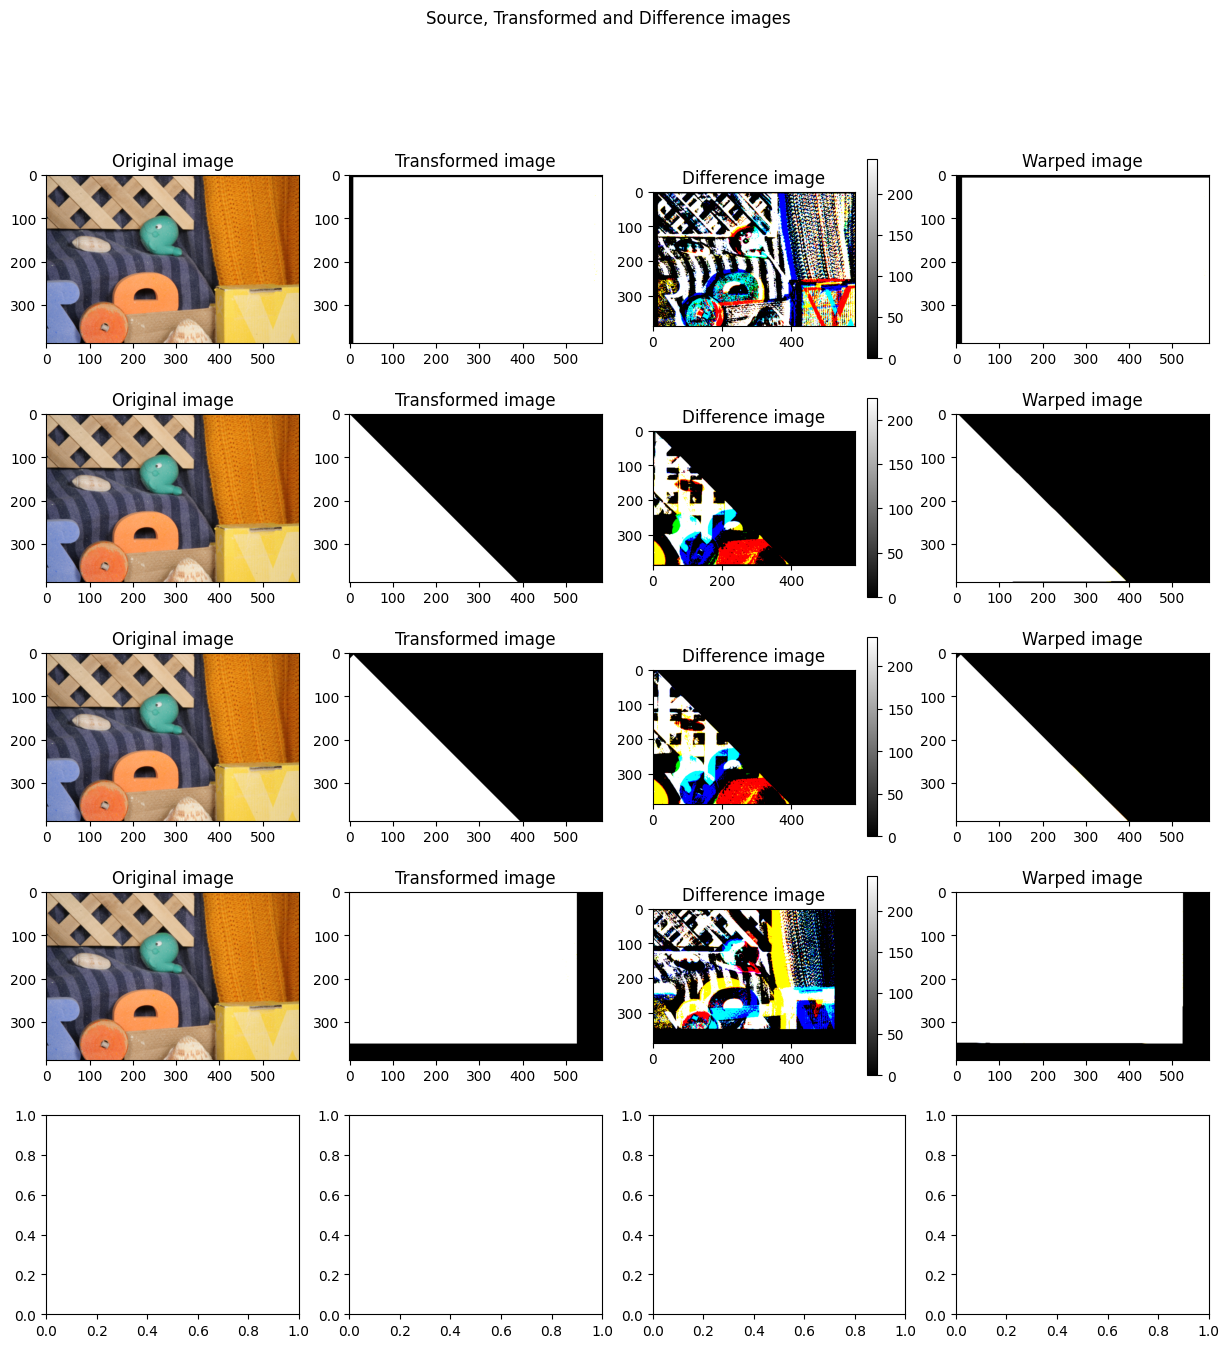

In [9]:
print("------ Inverse Compositional Algorithm on dataset_tu ------")
fig, axs = plt.subplots(5, 4, figsize=(15,15))
fig.suptitle("Source, Transformed and Difference images")
i = 0
for sample_key, sample in dataset_tu.items():
    print("Processing dataset image: ", sample_key)
    original_image = sample["original_image"]
    transformation_type = sample["transformation_type"]
    p = np.zeros(transformation_type.nparams())
    gt = sample["gt"]
    # we generate the source image according to the ground truth
    # source_image = generate_source_image(original_image, transformation_type, gt)
    # we transform the source image to the target image according to the ground truth
    transformed_image = sample["transformed_image"]
    # p, error, DI, Iw = inverse_compositional_algorithm(
    #             original_image, transformed_image, p, transformation_type, params_ica["TOL"], params_ica["verbose"]
    #         )
    print("With Meta parameters: ", params_pica)
    p, error, DI, Iw = pyramidal_inverse_compositional_algorithm(
        original_image,
        transformed_image,
        p,
        transformation_type, 
        params_pica["pyramid_levels"], 
        params_pica["nu"],
        params_pica["TOL"],
        io.RobustErrorFunctionType.QUADRATIC, 
        0,  
        params_pica["verbose"]
    )
    # display the image
    axs[i][0].imshow(original_image)
    axs[i][0].set_title("Original image")
    # axs[i][1].imshow(source_image)
    # axs[i][1].set_title("Source image")
    axs[i][1].imshow(transformed_image)
    axs[i][1].set_title("Transformed image")
    img = axs[i][2].imshow(DI, cmap="gray", vmin=0, vmax=np.max(np.max(DI)))
    fig.colorbar(img, ax=axs[i][2])
    axs[i][2].set_title("Difference image")
    axs[i][3].imshow(Iw)
    axs[i][3].set_title("Warped image")
    i += 1
    print("Original parameters: ", gt)
    print("Estimated parameters: ", p)
    print("Error on estimation: ", error)

plt.show()
